## Task 1: Import Libraries

In [ ]:
! pip install pennylane numpy matplotlib -qqq

In [3]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt

## Task 2: Load a Quantum Device

In [4]:
dev = qml.device('default.qubit', wires = 2)

## Task 3-6: Create the Quantum Circuit Function

In [5]:
def circuit(theta):
    qml.RY(theta[0], wires = 0)
    qml.CRX(theta[1], wires = [1, 0]) 
    return qml.probs(wires = [0, 1])

## Task 7: Create a Quantum Node

In [6]:
model = qml.QNode(circuit, dev)

## Task 8: Visualize the Circuit

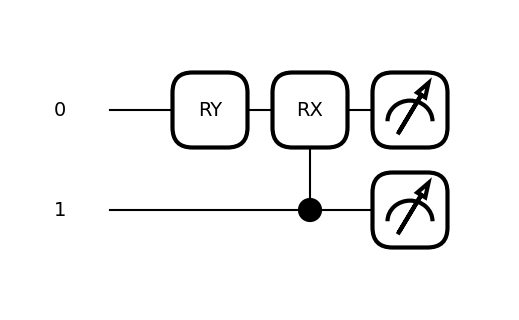

In [7]:
fig = qml.draw_mpl(model)([np.pi/2, np.pi/4])

## Task 9: Simulate the Circuit

In [8]:
print(model([np.pi/2, np.pi/4]))

[0.5 0.  0.5 0. ]


## Task 10: Create the Cost Function

In [9]:
def cost(params):
    return np.sum(( model(params) - [0.5, 0., 0., 0.5])**2)

## Task 11: Initialize the Optimizer

In [10]:
opt = qml.AdamOptimizer(stepsize = 0.1)

## Task 12: Optimize the Circuit

In [11]:
# set the initial value of the parameter
params = np.array([np.finfo(float).eps, np.finfo(float).eps])

# set the number of steps
steps = 200

# Arrays to store optimization results
param_arr = np.empty((steps, 2))
cost_arr  = np.empty((steps, 1))

# Optimization
for i in range(steps):
    # update the circuit parameters
    param_arr[i] = params 
    cost_arr[i] = cost(params)
    params = opt.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:3d}: {: .7f}".format(i + 1, cost(params)))

# Print the results of optimization
print("Optimized rotation angles: ",params)
print("Cost value at optimized parameters: ",cost(params))

Cost after step   5:  0.4910069
Cost after step  10:  0.4236281
Cost after step  15:  0.3763234
Cost after step  20:  0.3950684
Cost after step  25:  0.3751622
Cost after step  30:  0.3808933
Cost after step  35:  0.3774676
Cost after step  40:  0.3756136
Cost after step  45:  0.3764698
Cost after step  50:  0.3750475
Cost after step  55:  0.3756126
Cost after step  60:  0.3750001
Cost after step  65:  0.3752267
Cost after step  70:  0.3750000
Cost after step  75:  0.3750829
Cost after step  80:  0.3750007
Cost after step  85:  0.3750284
Cost after step  90:  0.3750031
Cost after step  95:  0.3750072
Cost after step 100:  0.3750039
Cost after step 105:  0.3750007
Cost after step 110:  0.3750024
Cost after step 115:  0.3750001
Cost after step 120:  0.3750006
Cost after step 125:  0.3750004
Cost after step 130:  0.3750000
Cost after step 135:  0.3750002
Cost after step 140:  0.3750001
Cost after step 145:  0.3750000
Cost after step 150:  0.3750000
Cost after step 155:  0.3750000
Cost aft

## Task 13: Visualize the Optimization Process

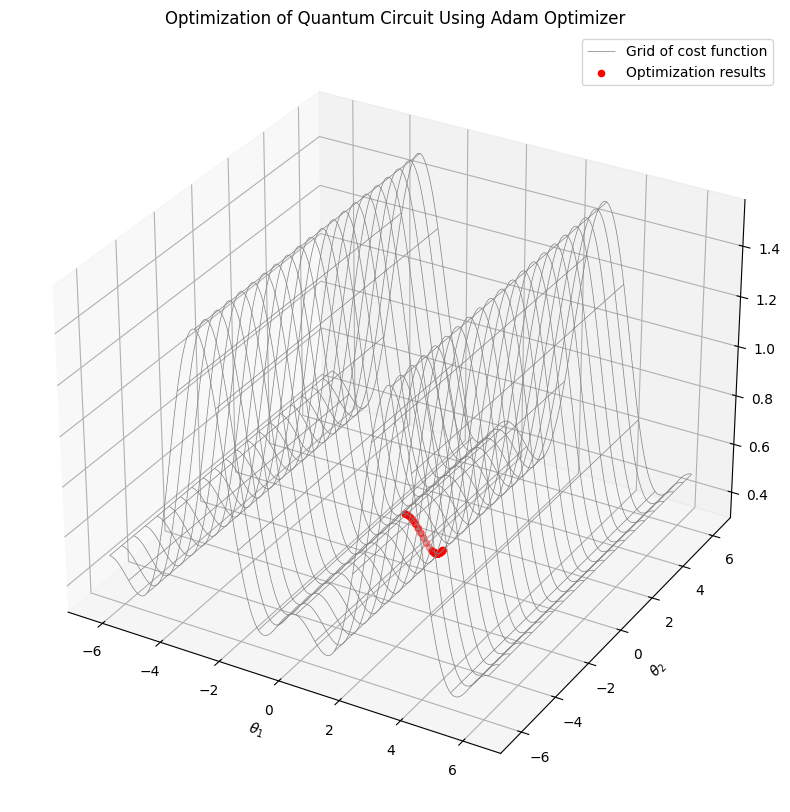

In [15]:
from surface_plot import plot_opt_surface
plot_opt_surface(cost_arr, param_arr, cost)

[Documentation Reference](https://pennylane.ai/docs/)


[image](image.png)